In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.ticker as mtick

# Conectar ao banco de dados
conn = sqlite3.connect(r'C:\Users\louis\datatech\Database\walmart_fraudes.db')

C:\Users\louis\AppData\Local\Temp\ipykernel_22972\2503202915.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='missing_count', y='product_label', data=top_products, palette='YlOrRd_r')
C:\Users\louis\AppData\Local\Temp\ipykernel_22972\2503202915.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='missing_count', data=categories_df, palette='viridis')
C:\Users\louis\AppData\Local\Temp\ipykernel_22972\2503202915.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='avg_price', data=categories_df, pale

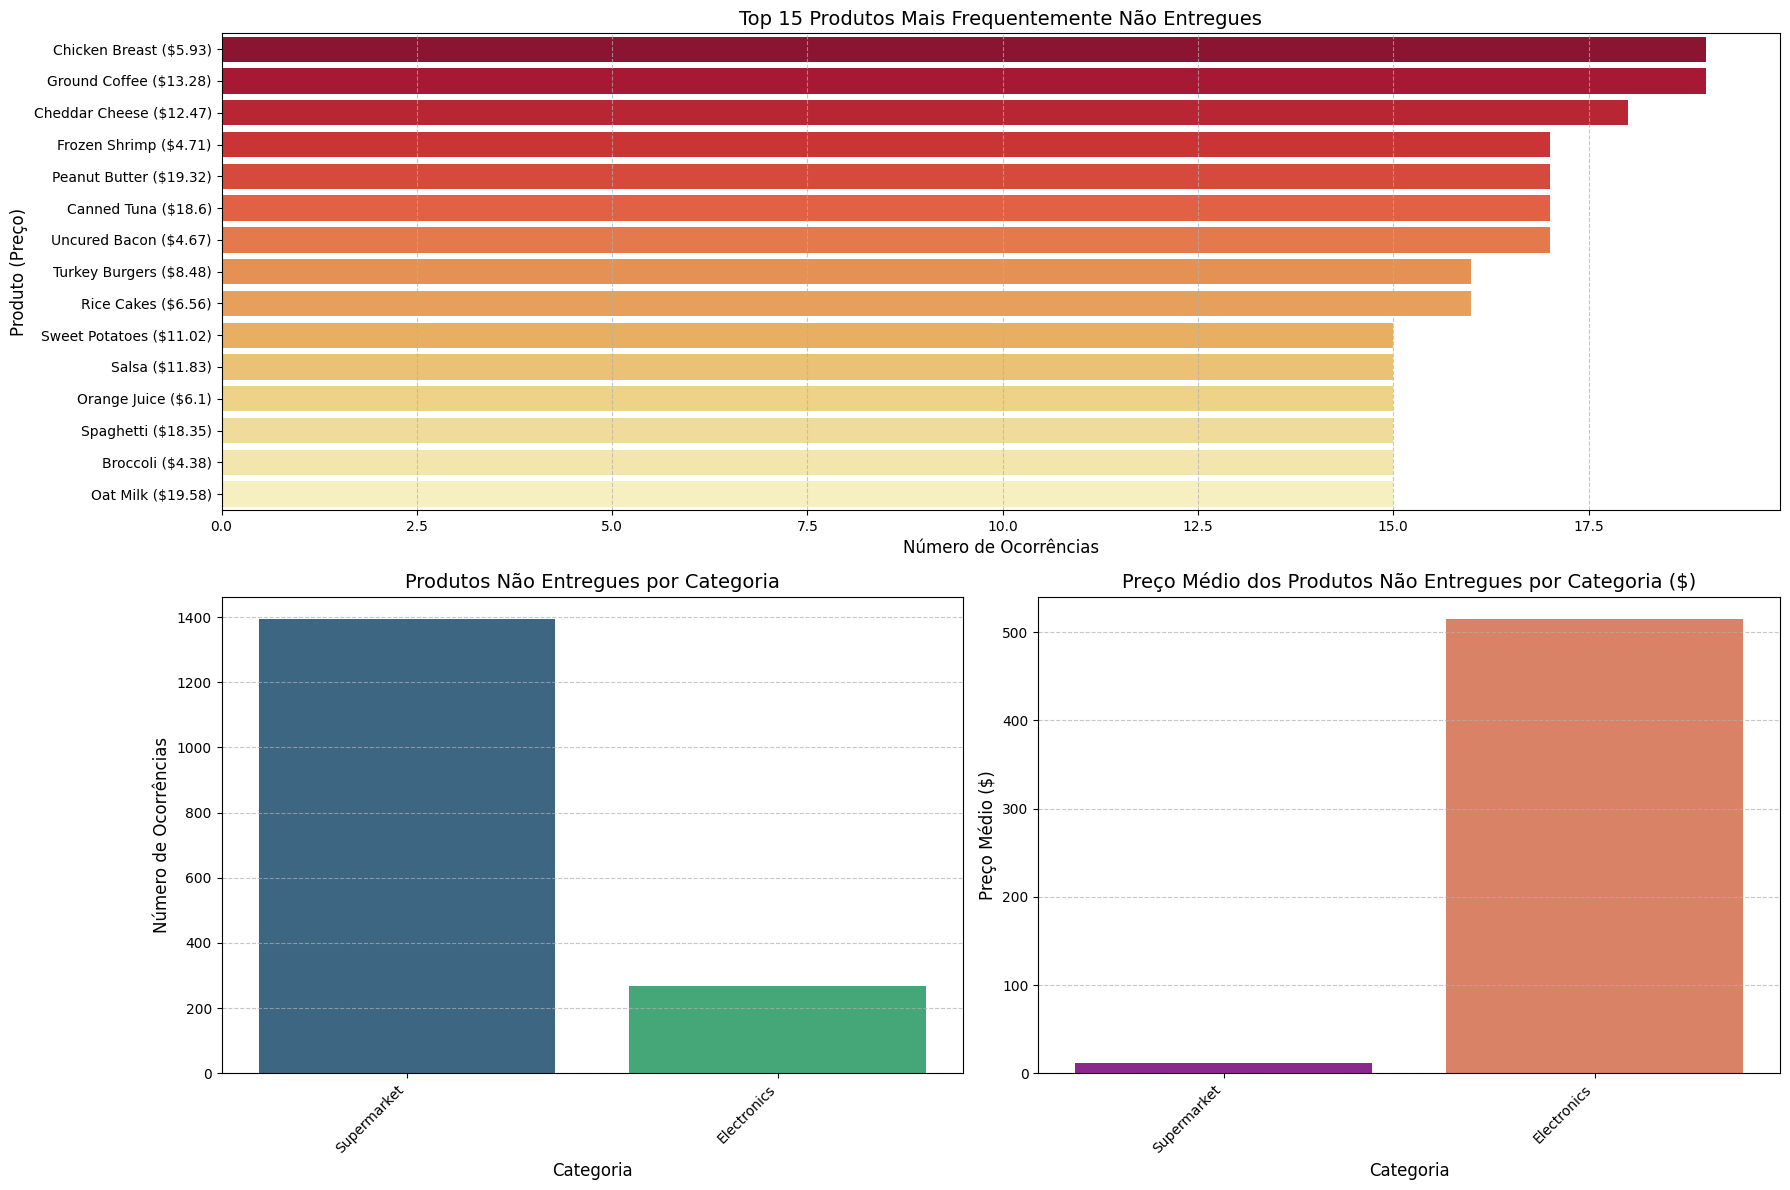

Top 20 Produtos Mais Frequentemente Não Entregues:
       product_id              product_name    category  price  missing_count
PWPX0982761090997            Chicken Breast Supermarket   5.93             19
PWPX0982761090993             Ground Coffee Supermarket  13.28             19
PWPX0982761090987            Cheddar Cheese Supermarket  12.47             18
PWPX0982761091078             Frozen Shrimp Supermarket   4.71             17
PWPX0982761090994             Peanut Butter Supermarket  19.32             17
PWPX0982761090992               Canned Tuna Supermarket  18.60             17
PWPX0982761090983             Uncured Bacon Supermarket   4.67             17
PWPX0982761091054            Turkey Burgers Supermarket   8.48             16
PWPX0982761091013                Rice Cakes Supermarket   6.56             16
PWPX0982761091063            Sweet Potatoes Supermarket  11.02             15
PWPX0982761091055                     Salsa Supermarket  11.83             15
PWPX098276109

In [2]:
# Análise dos produtos mais frequentemente não entregues
query_products = """
WITH product_counts AS (
    SELECT 
        product_id_1 AS product_id, 
        COUNT(*) AS frequency 
    FROM 
        missing_items 
    WHERE 
        product_id_1 IS NOT NULL
    GROUP BY 
        product_id_1
    
    UNION ALL
    
    SELECT 
        product_id_2 AS product_id, 
        COUNT(*) AS frequency 
    FROM 
        missing_items 
    WHERE 
        product_id_2 IS NOT NULL
    GROUP BY 
        product_id_2
    
    UNION ALL
    
    SELECT 
        product_id_3 AS product_id, 
        COUNT(*) AS frequency 
    FROM 
        missing_items 
    WHERE 
        product_id_3 IS NOT NULL
    GROUP BY 
        product_id_3
)

SELECT 
    pc.product_id,
    p.product_name,
    p.category,
    p.price,
    SUM(pc.frequency) AS missing_count
FROM 
    product_counts pc
JOIN 
    products p ON pc.product_id = p.product_id
GROUP BY 
    pc.product_id
ORDER BY 
    missing_count DESC
LIMIT 
    20
"""

products_df = pd.read_sql_query(query_products, conn)

# Análise por categoria de produto
query_categories = """
WITH product_counts AS (
    SELECT 
        product_id_1 AS product_id, 
        COUNT(*) AS frequency 
    FROM 
        missing_items 
    WHERE 
        product_id_1 IS NOT NULL
    GROUP BY 
        product_id_1
    
    UNION ALL
    
    SELECT 
        product_id_2 AS product_id, 
        COUNT(*) AS frequency 
    FROM 
        missing_items 
    WHERE 
        product_id_2 IS NOT NULL
    GROUP BY 
        product_id_2
    
    UNION ALL
    
    SELECT 
        product_id_3 AS product_id, 
        COUNT(*) AS frequency 
    FROM 
        missing_items 
    WHERE 
        product_id_3 IS NOT NULL
    GROUP BY 
        product_id_3
)

SELECT 
    p.category,
    SUM(pc.frequency) AS missing_count,
    COUNT(DISTINCT pc.product_id) AS unique_products,
    ROUND(AVG(p.price), 2) AS avg_price
FROM 
    product_counts pc
JOIN 
    products p ON pc.product_id = p.product_id
GROUP BY 
    p.category
ORDER BY 
    missing_count DESC
"""

categories_df = pd.read_sql_query(query_categories, conn)

# Visualização
plt.figure(figsize=(18, 12))

# Gráfico 1: Top 15 produtos mais frequentemente não entregues
plt.subplot(2, 1, 1)
top_products = products_df.head(15).copy()
top_products['product_label'] = top_products['product_name'] + ' ($' + top_products['price'].astype(str) + ')'
sns.barplot(x='missing_count', y='product_label', data=top_products, palette='YlOrRd_r')
plt.title('Top 15 Produtos Mais Frequentemente Não Entregues', fontsize=14)
plt.xlabel('Número de Ocorrências', fontsize=12)
plt.ylabel('Produto (Preço)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Gráfico 2: Análise por categoria de produto
plt.subplot(2, 2, 3)
sns.barplot(x='category', y='missing_count', data=categories_df, palette='viridis')
plt.title('Produtos Não Entregues por Categoria', fontsize=14)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 3: Preço médio por categoria
plt.subplot(2, 2, 4)
sns.barplot(x='category', y='avg_price', data=categories_df, palette='plasma')
plt.title('Preço Médio dos Produtos Não Entregues por Categoria ($)', fontsize=14)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Preço Médio ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Top 20 produtos mais frequentemente não entregues
print("Top 20 Produtos Mais Frequentemente Não Entregues:")
print(products_df.to_string(index=False))

# Estatísticas por categoria
print("\nEstatísticas por Categoria de Produto:")
print(categories_df.to_string(index=False))